In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy import stats

select2=pd.read_csv("select2.csv",sep=',') # avec NaN restants
select100g2=pd.read_csv("select100g2.csv",sep=',') # juste var. nutri, avec NA

ndx = set(select2.index.tolist()) & set(select100g2.index.tolist())

In [2]:
select100g2.shape

(126338, 15)

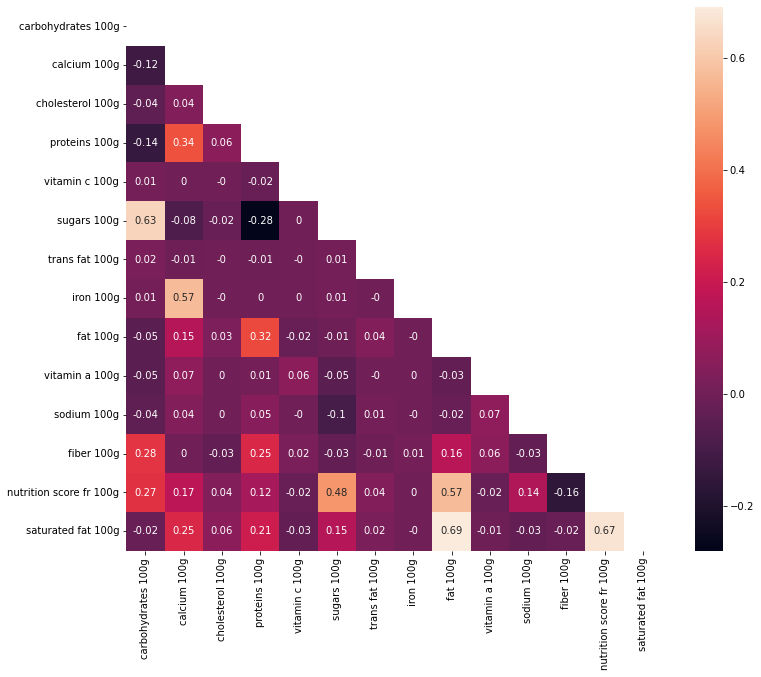

In [3]:
corel = select100g2.corr().round(decimals=2)
fig, ax = plt.subplots(figsize=(12, 10))
mk = np.triu(np.ones_like(corel, dtype=bool)) #masquer le triangle sup
sns.heatmap(corel, annot=True, mask=mk)
plt.savefig("correlationmatrix_analyse.png",bbox_inches='tight')

In [4]:
select2.columns.tolist()

['Unnamed: 0',
 'product name',
 'carbohydrates 100g',
 'url',
 'countries tags',
 'calcium 100g',
 'nutrition grade fr',
 'ingredients from palm oil n',
 'additives tags',
 'countries fr',
 'ingredients text',
 'cholesterol 100g',
 'created t',
 'code',
 'proteins 100g',
 'vitamin c 100g',
 'sugars 100g',
 'trans fat 100g',
 'states tags',
 'iron 100g',
 'fat 100g',
 'vitamin a 100g',
 'brands',
 'sodium 100g',
 'fiber 100g',
 'last modified t',
 'ingredients that may be from palm oil n',
 'nutrition score fr 100g',
 'last modified datetime',
 'brands tags',
 'states fr',
 'states',
 'countries',
 'serving size',
 'additives fr',
 'additives',
 'creator',
 'additives n',
 'created datetime',
 'energy 100g',
 'saturated fat 100g']

In [5]:
df_pca=select100g2.dropna(axis=0)
print(df_pca.shape)
df_pca.reset_index(drop=True,inplace=True)
df_pca.head()

(126237, 15)


,product name,carbohydrates 100g,calcium 100g,cholesterol 100g,proteins 100g,vitamin c 100g,sugars 100g,trans fat 100g,iron 100g,fat 100g,vitamin a 100g,sodium 100g,fiber 100g,nutrition score fr 100g,saturated fat 100g
0,Banana Chips Sweetened (Whole),64.29,0.000,0.018,3.57,0.0214,14.29,0.0,0.00129,28.57,0.0,0.000,3.6,14.0,28.57
1,Peanuts,60.71,0.071,0.000,17.86,0.0000,17.86,0.0,0.00129,17.86,0.0,0.250,7.1,0.0,0.00
2,Granola Cranberry And Acai,74.55,0.036,0.000,9.09,0.0000,25.45,0.0,0.00262,10.91,0.0,0.100,5.5,6.0,0.91
3,"Peanuts, Mixed Nuts",25.00,0.071,0.000,25.00,0.0000,14.29,0.0,0.00514,42.86,0.0,0.214,7.1,14.0,7.14
4,Cranberries,83.33,0.000,0.000,0.00,0.0000,66.67,0.0,0.00000,0.00,0.0,0.000,10.0,8.0,0.00


In [6]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

x_prenorm=df_pca.iloc[:,1:] #selection des features
scaler = MinMaxScaler()
x = scaler.fit_transform(x_prenorm)
x=x+1
x=np.log2(x)

samples=df_pca.index.tolist()
varz=df_pca.columns.tolist()
varz.pop(0) #je recup les noms de cols et drope le GR pr avoir juste les variables

data_norm=pd.DataFrame(x,columns=varz) #je refais un df avec mon ndarray + les noms de colonnes
data_norm.to_csv(r'normalized_data_pca.csv')

pca_test= PCA()
principalComponents_test = pca_test.fit_transform(x) #ndarray

principal_test_Df = pd.DataFrame(data = principalComponents_test)

###########################
print(pca_test.explained_variance_ratio_*100)
principal_test_Df.to_csv(r'pca.csv')
print(principal_test_Df.columns.tolist())

[5.27770307e+01 2.55226572e+01 1.16050110e+01 3.96080427e+00
 3.39212571e+00 1.19162258e+00 8.43444484e-01 5.44465166e-01
 8.13266049e-02 5.75016055e-02 1.33836863e-02 4.23979976e-03
 3.50637845e-03 2.88089840e-03]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [9]:
varpca=["sugars 100g","carbohydrates 100g","sodium 100g","fat 100g","fiber 100g"]

for vp in varpca:
    nm='tranche '+vp
    interval=round(df_pca[vp].max()/5)
    
   # print(str(df_pca[vp].min()+2*interval)+" "+str(df_pca[vp].max()-2*interval))
   # print(str(df_pca[vp].min()+interval)+" "+str( df_pca[vp].min()+2*interval))
   # print(str(df_pca[vp].max()-interval)+" "+str(df_pca[vp].max()-2*interval))

    df_pca.loc[df_pca[vp].between(df_pca[vp].min()+2*interval ,
                                         df_pca[vp].max()-2*interval), nm]='Moyen'
    df_pca.loc[df_pca[vp].between(df_pca[vp].min()+interval ,
                                         df_pca[vp].min()+2*interval), nm]='Bas'
    df_pca.loc[df_pca[vp].between(df_pca[vp].max()-2*interval,
                                  df_pca[vp].max()-interval), nm]='Haut'
    df_pca.loc[df_pca[vp]>df_pca[vp].max()-interval, nm] = 'Très haut'
    df_pca.loc[df_pca[vp]<df_pca[vp].min()+interval, nm] = 'Très bas'

<Figure size 432x288 with 0 Axes>

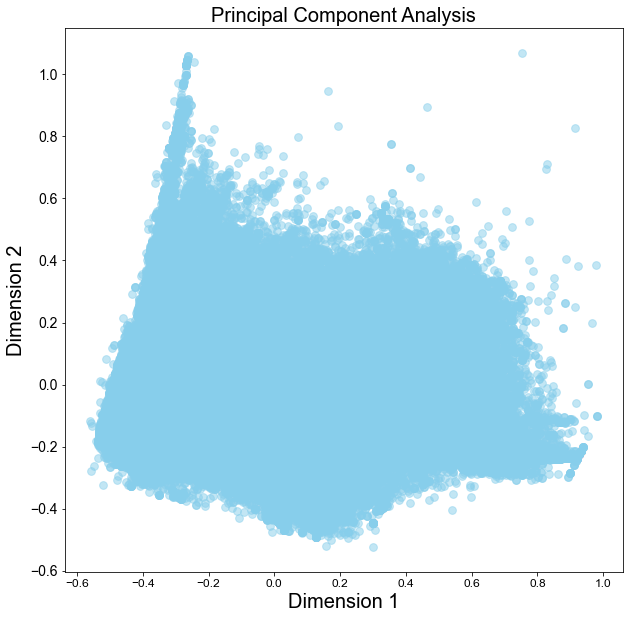

In [10]:
# PCA sans coloration

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Dimension 1',fontsize=20)
plt.ylabel('Dimension 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)

color='skyblue'

plt.scatter(principal_test_Df.iloc[:,0], 
principal_test_Df.iloc[:,1], c = color, s = 60,alpha=0.5)

plt.style.use('seaborn-whitegrid')


plt.savefig("PCA_simple.png")
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

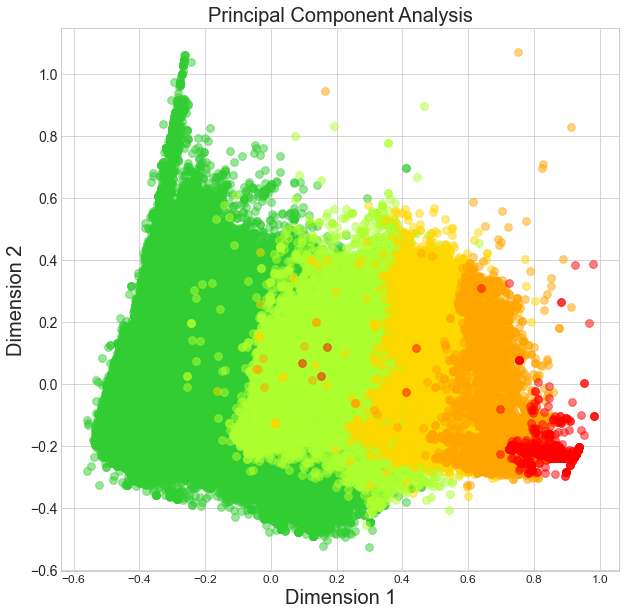

<Figure size 432x288 with 0 Axes>

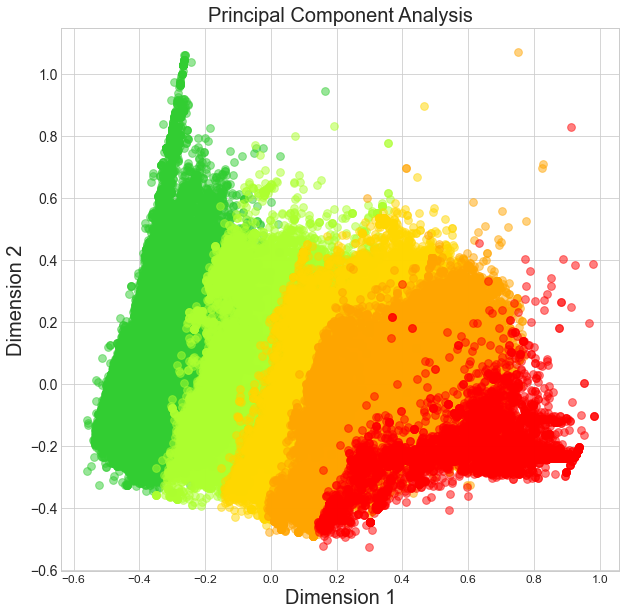

<Figure size 432x288 with 0 Axes>

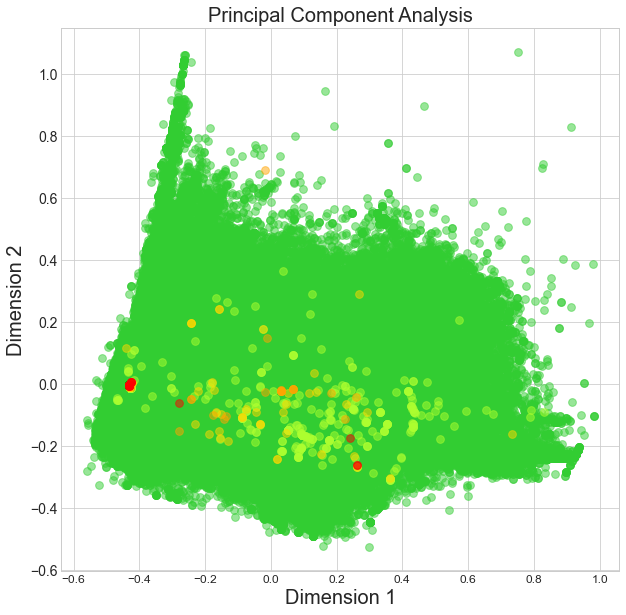

<Figure size 432x288 with 0 Axes>

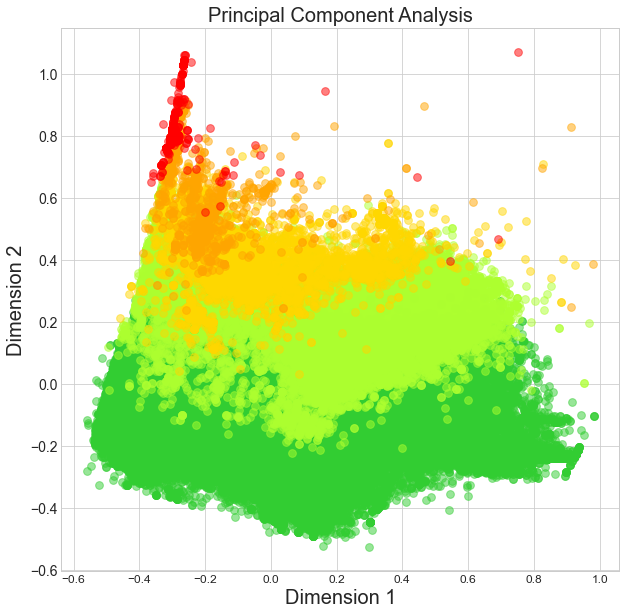

<Figure size 432x288 with 0 Axes>

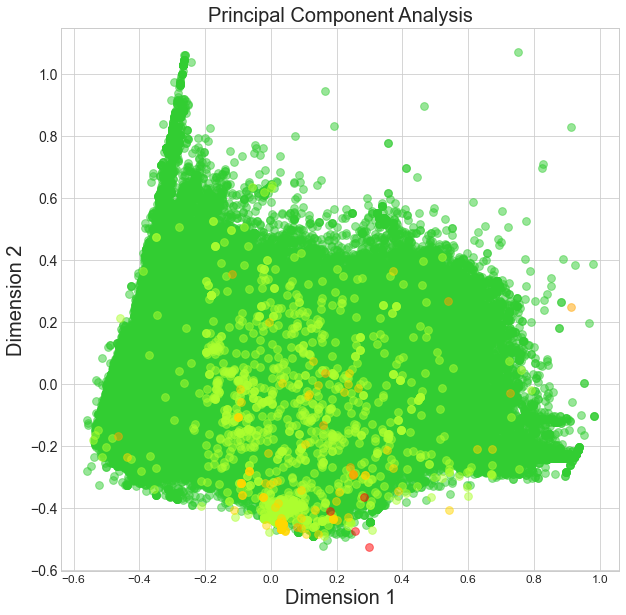

In [11]:
targets=['Très bas','Bas','Moyen','Haut','Très haut']
#Coloration en fonction de seuils

for vp in varpca:
    nm='tranche '+vp
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Dimension 1',fontsize=20)
    plt.ylabel('Dimension 2',fontsize=20)
    plt.title("Principal Component Analysis",fontsize=20)

    colors=['limegreen','greenyellow','gold','orange','red']

#plt.scatter(principal_test_Df.iloc[:,0], 
#principal_test_Df.iloc[:,1], c = color, s = 50,edgecolors='black')

    plt.style.use('seaborn-whitegrid')
    for target, color in zip(targets,colors):
        indicesToKeep = df_pca[nm] == target #colonne des grpes cibles #NOT COHORT
    
        plt.scatter(principal_test_Df.loc[indicesToKeep, 0]
               , principal_test_Df.loc[indicesToKeep, 1]
                , c = color,alpha=0.5, s=60)


    plt.savefig("PCA"+vp+".png")
    plt.show()
    plt.close()

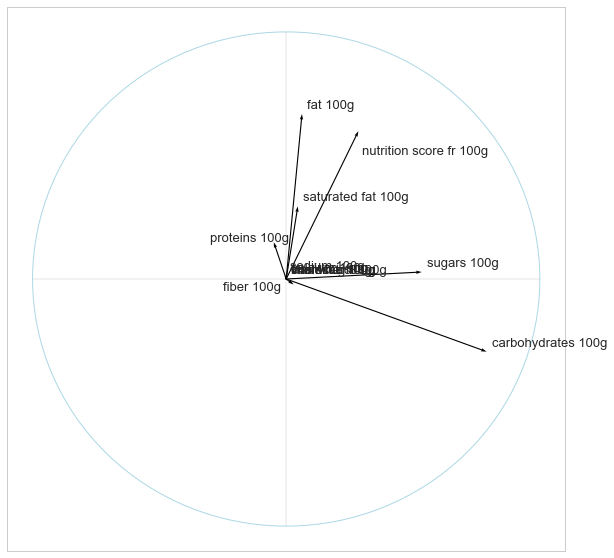

In [25]:
pca_test.n_components_

PCs = pca_test.components_

fig = plt.figure(figsize=(10,10))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1, width=0.002,cmap='tab20c')


man=["nutrition score fr 100g","proteins 100g","fiber 100g"]
coor=[(0.3,0.5),(-0.3,0.15),(-0.25,-0.05)]
feature_names = np.arange(PCs.shape[1])
for i in feature_names:
    txt=select100g2.columns.values[i+1]
    if txt in man: 
        plt.text(coor[man.index(txt)][0],coor[man.index(txt)][1], txt,size=13)
        
    else:
        plt.text(PCs[0, i] + 0.02,
                 PCs[1, i] + 0.02,
                 txt,size=13)

sns.set_style("whitegrid")
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='lightblue')
plt.gca().add_artist(circle)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

plt.xticks([])
plt.yticks([])
plt.hlines(xmin=-1,xmax=1,y=0,color='k',linewidths=0.1)
plt.vlines(ymin=-1,ymax=1,x=0,color='k',linewidths=0.1)

plt.savefig("circle.png")
plt.show()

#"nutition score fr" (0.4,0.4)
#"proteins 100g" (-0.2,0.2)

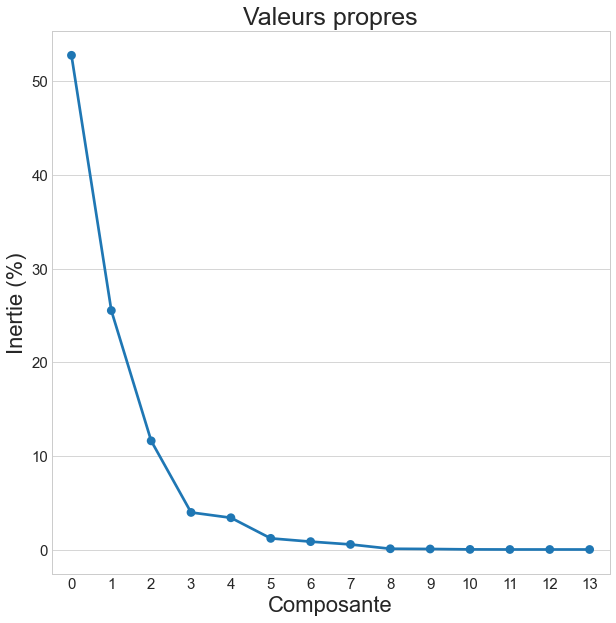

In [47]:
np.arange(PCs.shape[1])

indx = np.arange(0, 14)
(fig, ax) = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
sns.pointplot(x=indx, y=pca_test.explained_variance_ratio_ * 100)
#ax.set_xticks(indx)
ax.set_xticklabels(indx,fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Composante',size=22)
ax.set_ylabel('Inertie (%)',size=22)
#ax.set_title('testplot')
plt.title("Valeurs propres",size=25)
plt.savefig("Composantes.png")
plt.show()

In [16]:
select2.head()

,Unnamed: 0,product name,carbohydrates 100g,url,countries tags,calcium 100g,nutrition grade fr,ingredients from palm oil n,additives tags,countries fr,...,states,countries,serving size,additives fr,additives,creator,additives n,created datetime,energy 100g,saturated fat 100g
0,0,Banana Chips Sweetened (Whole),64.29,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.000,d,0.0,Empty,États-Unis,...,"en:to-be-completed, en:nutrition-facts-complet...",US,28 g (1 ONZ),Empty,[ bananas -> en:bananas ] [ vegetable-oil -...,usda-ndb-import,0.0,2017-03-09T14:32:37Z,2243.0,28.57
1,1,Peanuts,60.71,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.071,b,0.0,Empty,États-Unis,...,"en:to-be-completed, en:nutrition-facts-complet...",US,28 g (0.25 cup),Empty,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,usda-ndb-import,0.0,2017-03-09T14:32:37Z,1941.0,0.00
2,2,Granola Cranberry And Acai,74.55,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.036,c,0.0,Empty,États-Unis,...,"en:to-be-completed, en:nutrition-facts-complet...",US,55 g (0.5 cup),Empty,[ whole-rolled-oats -> en:whole-rolled-oats ...,usda-ndb-import,0.0,2017-03-09T09:07:04Z,1824.0,0.91
3,3,"Peanuts, Mixed Nuts",25.00,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.071,d,0.0,en:e415,États-Unis,...,"en:to-be-completed, en:nutrition-facts-complet...",US,28 g (0.25 cup),E415 - Gomme xanthane,[ peanuts -> en:peanuts ] [ honey -> en:hon...,usda-ndb-import,1.0,2017-03-09T09:07:04Z,2389.0,7.14
4,4,Cranberries,83.33,http://world-fr.openfoodfacts.org/produit/0000...,en:united-states,0.000,c,0.0,Empty,États-Unis,...,"en:to-be-completed, en:nutrition-facts-complet...",US,30 g (0.25 cup),Empty,[ cranberries -> en:cranberries ] [ sugar -...,usda-ndb-import,0.0,2017-03-09T09:07:04Z,1255.0,0.00


In [17]:
select2.set_index('product name',inplace=True)

In [34]:

sug=pd.cut(select2['sugars 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
carb=pd.cut(select2['carbohydrates 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
sod=pd.cut(select2['sodium 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
addit=pd.cut(select2['additives n'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
fat=pd.cut(select2['fat 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
prot=pd.cut(select2['proteins 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
tfat=pd.cut(select2['trans fat 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
nrj=pd.cut(select2['energy 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
chol=pd.cut(select2['cholesterol 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])
score=pd.cut(select2['nutrition score fr 100g'],bins=5,labels=['minimum','bas','moyen','haut','maximum'])

In [36]:
comp=[(addit,sug),(carb,sug),(nrj,sug),(sod,sug),
      (chol,nrj),(chol,fat),(chol,tfat),(chol,carb),
      (fat,tfat),(fat,prot),(fat,sug),(fat,sod),
      (chol,score),(sug,score),(sod,score),(fat,score),
      (sod,carb),(score,carb),(fat,carb),(addit,carb)
     ]

result=open('Khi2.csv', "w")
result.write("var1,var2,P-value,khi2 \n")

from scipy.stats import chi2_contingency as chi2_contingency

# h0 = la diff entre observed et expected n'est pas significative -> les var sont indépdtes
# pval < 0.05 = on rejette h0

for c in comp:
    obs=pd.crosstab(c[0],c[1])
    k2, pv , ddl , expected = chi2_contingency(obs)
    result.write(str(c[0].name)+','+str(c[1].name)+','+str(pv)+','+str(k2)+' \n')
    print ("pval= "+str(pv)+" - k2= "+str(k2))
    ex2=pd.DataFrame(expected)
    obs
result.close()

pval= 6.930412241651127e-285 - k2= 1383.1169268924675
pval= 0.0 - k2= 83020.36246864752
pval= 1.2478394221543467e-50 - k2= 282.15679528888467
pval= 1.6083228534025948e-09 - k2= 74.49402783698551
pval= 0.9999916595698314 - k2= 0.008179583229361584
pval= 0.450649596418219 - k2= 3.6826829670907437
pval= 0.9999999874628716 - k2= 0.00031671377704715816
pval= 0.8510383515344633 - k2= 1.3604539423295343
pval= 3.612090716811752e-08 - k2= 66.79284878099004
pval= 0.0 - k2= 12522.261572986075
pval= 0.0 - k2= 5343.061151294753
pval= 1.8931021847494193e-37 - k2= 217.866339199378
pval= 0.1663577848747572 - k2= 6.475230236719449
pval= 0.0 - k2= 37808.35891066648
pval= 3.5775317547761776e-78 - k2= 414.3416154477753
pval= 0.0 - k2= 38809.39518156863
pval= 1.9575348423923817e-56 - k2= 310.2047657780346
pval= 0.0 - k2= 19099.832853223885
pval= 0.0 - k2= 19531.671175558615
pval= 0.0 - k2= 2382.1525049438183


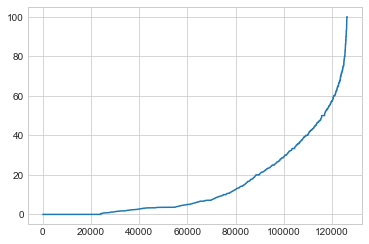

In [20]:
plou=select2['sugars 100g'].sort_values()
plt.plot(plou.values)

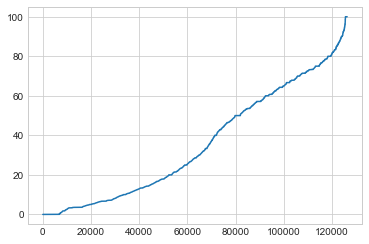

In [21]:
plou=select2['carbohydrates 100g'].sort_values()
plt.plot(plou.values)

In [22]:
import scipy
kekegne=['trans fat 100g','carbohydrates 100g']
pouic=select2[kekegne].dropna(axis=0)

pouic=pouic[(pouic.iloc[:,0]<100) & (pouic.iloc[:,0]>0)]
x1=pouic.iloc[:,0]
y1=pouic.iloc[:,1]
        
scoef,spval=stats.pearsonr(x1,y1)
fig, ax = plt.subplots(figsize=(12,10))

slope, intercept, r, p, stderr = scipy.stats.linregress(x1, y1)
ax.scatter(x=x1,y=y1)
ax.plot(x1, intercept + scoef * x1, label="Regression Line",color='orange')
plt.xlabel('trans fat 100g',size=15)
plt.ylabel('carbohydrates 100g',size=15)
plt.title('Corr. coeff : '+str(round(scoef,3)),size=15)
plt.savefig("corell_fat_carb.png")    
plt.close() 

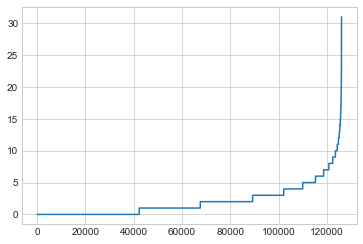

In [23]:
addit=select2['additives n'].sort_values()
plt.plot(addit.values)